In [1]:
import soundfile
from skimage import feature
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from skimage.feature import match_template

In [2]:
from scipy.signal import butter, sosfilt, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [4]:
sig1= np.load('WavTemplates/Waldschnepfe_DIG0080_03_Sekunde6.npy')
sig2= np.load('WavTemplates/Waldschnepfe_DIG0080_03_Sekunde9.npy')
sig3= np.load('WavTemplates/Waldschnepfe_DIG0080_03_Sekunde12.npy')
sig4= np.load('WavTemplates/Waldschnepfe_DIG0161_66_Sekunde2.npy')

In [6]:
window=signal.windows.hann(M=2001)

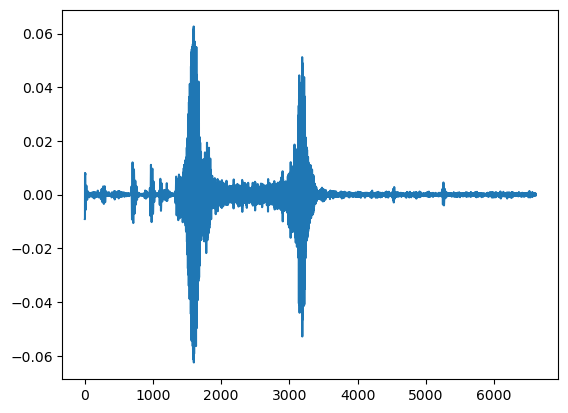

In [10]:
plt.plot(butter_bandpass_filter(sig4, 1e3, 10e3, fs=22050, order=5))

In [11]:
# FFT and Filtering parameters
band_freq_min=3000
band_freq_max=11020
windowlength=512 # also equals to NFFT
N_overlap=400 # Overlap length in STFT 
rate=22050

In [12]:
filtered_1 = butter_bandpass_filter(sig1, band_freq_min, band_freq_max, fs=rate, order=5)
filtered_2 = butter_bandpass_filter(sig2, band_freq_min, band_freq_max, fs=rate, order=5)
filtered_3 = butter_bandpass_filter(sig3, band_freq_min, band_freq_max, fs=rate, order=5)
filtered_4 = butter_bandpass_filter(sig4, band_freq_min, band_freq_max, fs=rate, order=5)

In [13]:
normed_1=filtered_1/max(filtered_1)
normed_2=filtered_2/max(filtered_2)
normed_3=filtered_3/max(filtered_3)
normed_4=filtered_4/max(filtered_4)

In [14]:
analytic_signal1 = signal.hilbert(normed_1)
analytic_signal2 = signal.hilbert(normed_2)
analytic_signal3 = signal.hilbert(normed_3)
analytic_signal4 = signal.hilbert(normed_4)

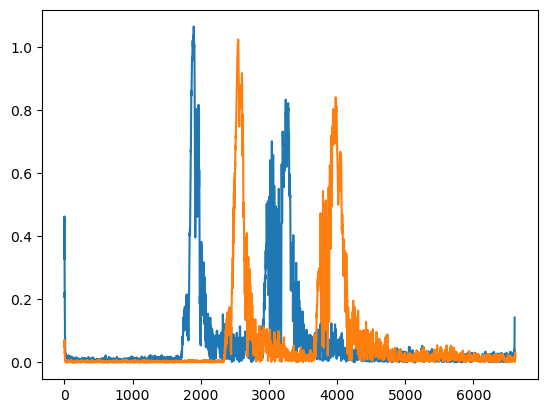

In [16]:
plt.plot(np.abs(analytic_signal1))
plt.plot(np.abs(analytic_signal2))

In [17]:
corr_11=signal.correlate(np.abs(analytic_signal1),np.abs(analytic_signal1))
corr_12=signal.correlate(np.abs(analytic_signal1),np.abs(analytic_signal2))
corr_13=signal.correlate(np.abs(analytic_signal1),np.abs(analytic_signal3))
corr_14=signal.correlate(np.abs(analytic_signal1),np.abs(analytic_signal4))

In [18]:
shift=np.argmax(corr_12)-np.argmax(corr_11)
an2=np.roll(analytic_signal2,shift)

shift=np.argmax(corr_13)-np.argmax(corr_11)
an3=np.roll(analytic_signal3,shift)

shift=np.argmax(corr_14)-np.argmax(corr_11)
an4=np.roll(analytic_signal4,shift)

an1=analytic_signal1

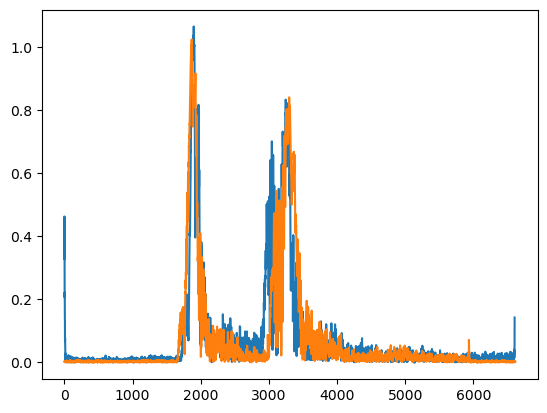

In [23]:
plt.plot(np.abs(an1))
plt.plot(np.abs(an2))

In [24]:
savgov_wind_size=81
instantaneous_phase = np.unwrap(np.angle(an1))
instantaneous_frequency = (np.diff(instantaneous_phase) / (2.0*np.pi))*rate
inst_freq1 = signal.savgol_filter(instantaneous_frequency, savgov_wind_size,1)
instantaneous_phase = np.unwrap(np.angle(an2))
instantaneous_frequency = (np.diff(instantaneous_phase) / (2.0*np.pi))*rate
inst_freq2 = signal.savgol_filter(instantaneous_frequency, savgov_wind_size,1)
instantaneous_phase = np.unwrap(np.angle(an3))
instantaneous_frequency = (np.diff(instantaneous_phase) / (2.0*np.pi))*rate
inst_freq3 = signal.savgol_filter(instantaneous_frequency, savgov_wind_size,1)
instantaneous_phase = np.unwrap(np.angle(an4))
instantaneous_frequency = (np.diff(instantaneous_phase) / (2.0*np.pi))*rate
inst_freq4 = signal.savgol_filter(instantaneous_frequency, savgov_wind_size,1)

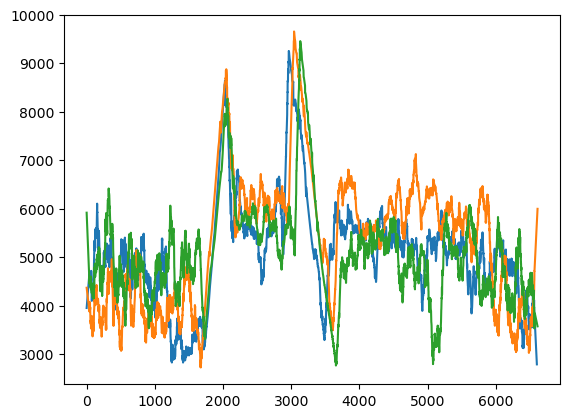

In [26]:
plt.plot(inst_freq1)
plt.plot(inst_freq2)
plt.plot(inst_freq3)
#plt.plot(inst_freq4)

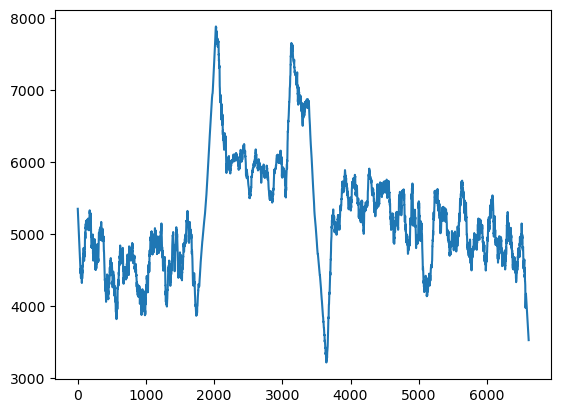

In [27]:
inst_freq_3and4=0.5*(inst_freq3+inst_freq4)
plt.plot(inst_freq_3and4)

In [114]:
inst_freq3=inst_freq3[:6604]
inst_freq2=inst_freq2[:6604]

In [30]:
shift=np.argmax(corr_12)-np.argmax(corr_11)
norm_shift_2=np.roll(normed_2,shift)

shift=np.argmax(corr_13)-np.argmax(corr_11)
norm_shift_3=np.roll(normed_3,shift)

shift=np.argmax(corr_14)-np.argmax(corr_11)
norm_shift_4=np.roll(normed_4,shift)

norm_shift_1=normed_1

In [31]:
synthetic=norm_shift_1[:6605]+norm_shift_3[:6605]

In [32]:
windowlength=512 # also equals to NFFT
N_overlap=400 # Overlap length in STFT 

In [33]:
f, t, Syy = signal.stft(synthetic, fs=rate,window='hann',noverlap=N_overlap,nfft=windowlength,nperseg=windowlength)
delta_T=t[1]
Syy=abs(Syy)
# Syy = librosa.amplitude_to_db(S=Syy,ref=np.max,amin=1e-05,top_db=85)
# Syy = np.log10(Syy)
print(Syy.shape)
print ('Freq resolution:', f[1], 'Time Resolution:', t[1])

(257, 60)
Freq resolution: 43.06640625 Time Resolution: 0.005079365079365078


/tmp/ipykernel_2817195/1790571849.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t[:],f[:]/1e3,20*np.log(Syy[:,:]))


Text(0.5, 0, 'Time [sec]')

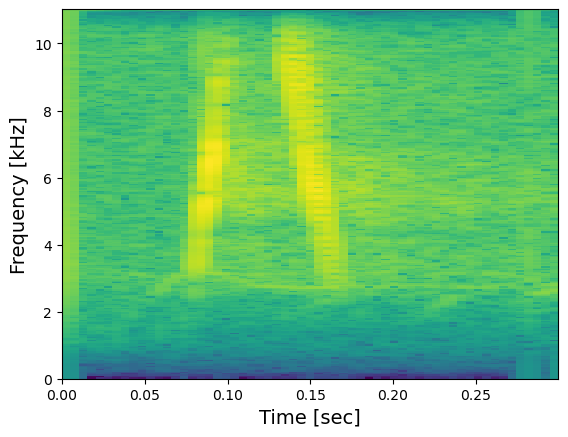

In [36]:
plt.pcolormesh(t[:],f[:]/1e3,20*np.log(Syy[:,:]))
plt.ylabel('Frequency [kHz]', fontsize=14)
plt.xlabel('Time [sec]',fontsize=14)

In [184]:
# librosa.output.write_wav('SyntheticTemplate2.wav',synthetic,sr=22050)
# np.save('synthetic_45_fft512_400_abs.npy',Syy)